In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
so_servey_df = pd.read_csv('./so_survey_df-end2.csv')
so_numeric_df = so_servey_df[['ConvertedSalary', 'Age', 'Years Experience', 'RawSalary']]

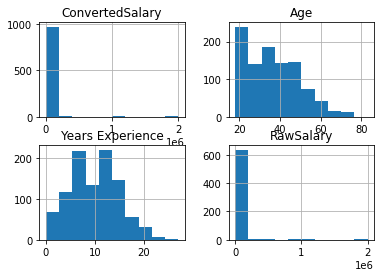

In [9]:
# Create a histogram
so_numeric_df.hist()
plt.show()

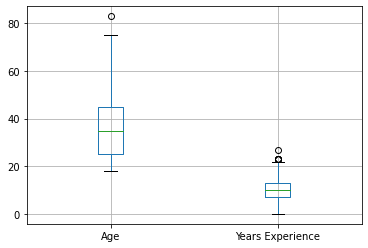

In [11]:
# Create a boxplot of two columns
so_numeric_df[['Age', 'Years Experience']].boxplot()
plt.show()

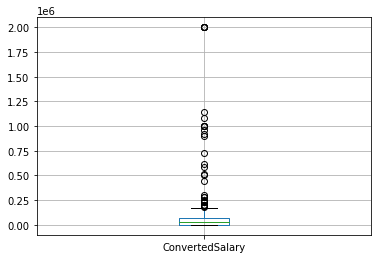

In [12]:
# Create a boxplot of ConvertedSalary
so_numeric_df[['ConvertedSalary']].boxplot()
plt.show()

In [16]:
so_numeric_df

,ConvertedSalary,Age,Years Experience,RawSalary
0,0.0,21,13,NaN
1,70841.0,38,9,70841.0
2,0.0,45,11,NaN
3,21426.0,46,12,21426.0
4,41671.0,39,7,41671.0
...,...,...,...,...
994,0.0,45,10,NaN
995,58746.0,27,16,58746.0
996,55000.0,54,16,55000.0
997,0.0,23,9,NaN


c:\Users\jdamodhar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is 

OptionError: No such keys(s): 'mode.use_inf_as_null'

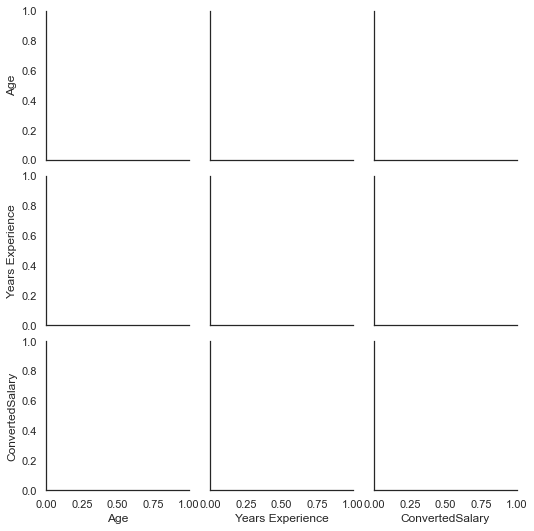

In [22]:
# Import packages
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set new parameter name
sns.set_theme(style="white", palette="muted", color_codes=True)

# Load the data
so_numeric_df = pd.read_csv('./so_numeric_df-end1.csv',dtype=np.float64)

# Plot pairwise relationships
sns.pairplot(so_numeric_df[['Age', 'Years Experience', 'ConvertedSalary']])

# Show plot
plt.show()

In [25]:
(so_numeric_df.describe())

,ConvertedSalary,StackOverflowJobsRecommend,Age,Years Experience
count,6.650000e+02,487.000000,999.000000,999.000000
mean,9.256517e+04,7.061602,36.003003,9.961962
std,2.091344e+05,2.621591,13.255127,4.878129
min,0.000000e+00,0.000000,18.000000,0.000000
25%,2.755000e+04,5.000000,25.000000,7.000000
50%,5.556200e+04,7.000000,35.000000,10.000000
75%,8.823800e+04,10.000000,45.000000,13.000000
max,2.000000e+06,10.000000,83.000000,27.000000


In [26]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Instantiate MinMaxScaler
MM_scaler = MinMaxScaler()

# Fit MM_scaler to the data
MM_scaler.fit(so_numeric_df[['Age']])

# Transform the data using the fitted scaler
so_numeric_df['Age_MM'] = MM_scaler.transform(so_numeric_df[['Age']])

# Compare the origional and transformed column
print(so_numeric_df[['Age_MM', 'Age']].head())

     Age_MM   Age
0  0.046154  21.0
1  0.307692  38.0
2  0.415385  45.0
3  0.430769  46.0
4  0.323077  39.0


In [27]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
SS_scaler = StandardScaler()

# Fit SS_scaler to the data
SS_scaler.fit(so_numeric_df[['Age']])

# Transform the data using the fitted scaler
so_numeric_df['Age_SS'] = SS_scaler.transform(so_numeric_df[['Age']])

# Compare the origional and transformed column
print(so_numeric_df[['Age_SS', 'Age']].head())


     Age_SS   Age
0 -1.132431  21.0
1  0.150734  38.0
2  0.679096  45.0
3  0.754576  46.0
4  0.226214  39.0


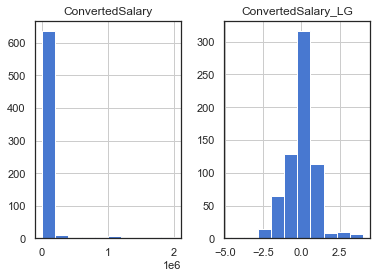

In [28]:

# Import PowerTransformer
from sklearn.preprocessing import PowerTransformer

# Instantiate PowerTransformer
pow_trans = PowerTransformer()

# Train the transform on the data
pow_trans.fit(so_numeric_df[['ConvertedSalary']])

# Apply the power transform to the data
so_numeric_df['ConvertedSalary_LG'] = pow_trans.transform(so_numeric_df[['ConvertedSalary']])

# Plot the data before and after the transformation
so_numeric_df[['ConvertedSalary', 'ConvertedSalary_LG']].hist()
plt.show()

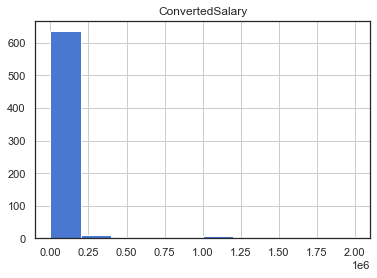

<Figure size 432x288 with 0 Axes>

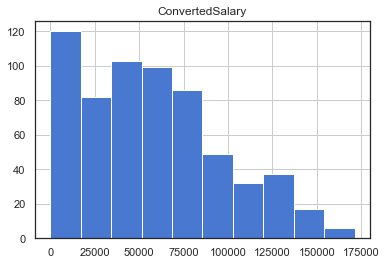

In [29]:
# Find the 95th quantile
quantile = so_numeric_df['ConvertedSalary'].quantile(0.95)

# Trim the outliers
trimmed_df = so_numeric_df[so_numeric_df['ConvertedSalary'] < quantile]

# The original histogram
so_numeric_df[['ConvertedSalary']].hist()
plt.show()
plt.clf()

# The trimmed histogram
trimmed_df[['ConvertedSalary']].hist()
plt.show()

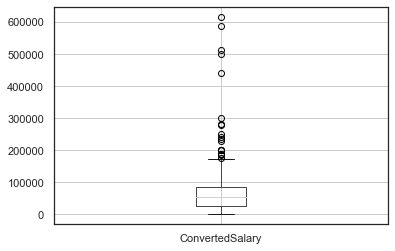

In [30]:
# Find the mean and standard dev
std = so_numeric_df['ConvertedSalary'].std()
mean = so_numeric_df['ConvertedSalary'].mean()

# Calculate the cutoff
cut_off = std * 3
lower, upper = mean - cut_off, mean + cut_off

# Trim the outliers
trimmed_df = so_numeric_df[(so_numeric_df['ConvertedSalary'] < upper) \
                          & (so_numeric_df['ConvertedSalary'] > lower)]

# The trimmed box plot
trimmed_df[['ConvertedSalary']].boxplot()
plt.show()

In [66]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler
# import split set
from sklearn.model_selection import train_test_split

# Apply a standard scaler to the data
SS_scaler = StandardScaler()
so_train_numeric , so_test_numeric = train_test_split(so_numeric_df[['Age', 'ConvertedSalary']], test_size=0.2)
# Fit the standard scaler to the data
SS_scaler.fit(so_train_numeric[['Age']])

# Transform the test data using the fitted scaler
so_test_numeric['Age_ss'] = SS_scaler.transform(so_test_numeric[['Age']])
print(so_test_numeric[['Age', 'Age_ss']].head())


      Age    Age_ss
753  54.0  1.336072
566  19.0 -1.294217
939  40.0  0.283956
665  30.0 -0.467555
740  26.0 -0.768159


<Axes: >

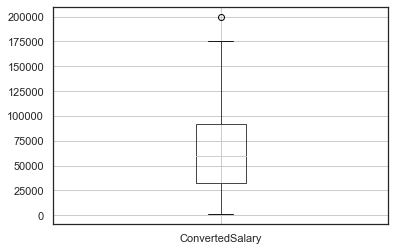

In [71]:

train_std = so_train_numeric['ConvertedSalary'].std()
train_mean = so_train_numeric['ConvertedSalary'].mean()


cut_off = train_std * 3
train_lower, train_upper = train_mean - cut_off, train_mean + cut_off

# Trim the test DataFrame
trimmed_df = so_test_numeric[(so_test_numeric['ConvertedSalary'] < train_upper) \
                            & (so_test_numeric['ConvertedSalary'] > train_lower)]
trimmed_df[['ConvertedSalary']].boxplot()


In [70]:
train_std = so_train_numeric['ConvertedSalary'].std()
train_mean = so_train_numeric['ConvertedSalary'].mean()

cut_off = train_std * 3
train_lower, train_upper = train_mean - cut_off, train_mean + cut_off

# Trim the test DataFrame
trimmed_df = so_test_numeric[(so_test_numeric['ConvertedSalary'] < train_upper) \
                             & (so_test_numeric['ConvertedSalary'] > train_lower)]